# Automatic Text Generation using Deep NLP on Machinelearninggeek.com Data
---
#### *Generating text to write articles using* **`Tensorflow`**, **`Keras`** and **`Long Short Term Memory(LSTM)`**. The dataset for the assignment was fetched using **`requests`** library from [Machine Learning Geek](https://machinelearninggeek.com/m)
---
- Submitted By : By Piyush Joshi
- Roll Number : DS5B-2121
- Submitted To : Prof. Avinash Nalvani
- Subject : Natural Language Processing
- Batch : MSc 3rd Sem (Data Science and Analytics)
- College : School of Data Science and Forecasting, DAVV, Indore

Link to Project - 

## Automatic Text Generation
Automatic text generation is the generation of natural language texts by computer. It has applications in automatic documentation systems, automatic letter writing, automatic report generation, etc. In this , we are going to generate words given a set of input words.

### LSTM
- Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory.
- Generally LSTM is composed of a cell (the memory part of the LSTM unit) and three “regulators”, usually called gates, of the flow of information inside the LSTM unit: an input gate, an output gate and a forget gate.
- Intuitively, the cell is responsible for keeping track of the dependencies between the elements in the input sequence.
- The input gate controls the extent to which a new value flows into the cell, the forget gate controls the extent to which a value remains in the cell and the output gate controls the extent to which the value in the cell is used to compute the output activation of the LSTM unit.
- The activation function of the LSTM gates is often the logistic sigmoid function.
- There are connections into and out of the LSTM gates, a few of which are recurrent. The weights of these connections, which need to be learned during training, determine how the gates operate.
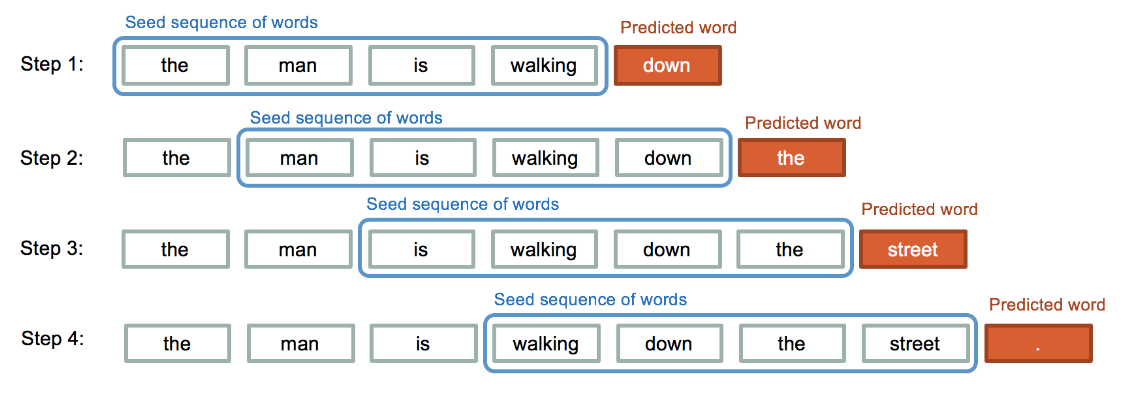

## Building a NLP Pipeline for Text Generation
---
### Step 1 : Data Acquisition
- In the first step we will get the data from website [https://machinelearninggeek.com/]( https://machinelearninggeek.com/) using the **`requests`** library and scrap it using the **`BeautifulSoup`** Library
- Once we are done with this step we will use **`pandas`** to convert it into a csv file

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import tensorflow as tf

#### Structure of the website
- In order to scrap the website we first need to understand the Document Object Model (DOM) of the website
- The website is composed of three category of pages which differ in their structure, link syntax and the way information is displayed on them
- The three category are being displayed in the diagram below out of which only two contains text which is to be scrapped
[![](https://mermaid.ink/img/pako:eNqdkk1rwkAQhv_KMqcVopgvNaH0oClFUAlEENr0sCbTuNjshmTTNrX-966x0hQPhZ5252Fm3peZOUAiUwQfspIVO7IOYkHIkj4uWbLjAhfISsFFdo-4HyQyf-qRfv-WfK4l2SKpEl1UYPq5CU26wW3BMiQzpjCTZUPMc25Iw0btpOjFQqe1aEVXi7ATLxf0W49cBHv_8UFutqWGm9C6dmO1elZbFtFIMcUrxZOqg-d0LhSWrxzfOnQa0CnPSMAU69BZRGesQhKpOm00_9vqSiqiWrvRz9jsa6P2OX9Kp1LuT_bAgBzLnPFUr-lwmksMaoc5xuDrb4rPrH5RMcTiqFNZrWTUiAR8VdZoQF2kunPAmV5w_hvepVzJ8sIKJh6kzDsh-Ad4B38y8BzX8TzHGtqOqV8DGvBN2xlYnj2xR547skxr7BwN-GgbDAfeaDz2LNO1bXfiuN7IAGy1ludba0_u-AVVRcde?type=png)](https://mermaid.live/edit#pako:eNqdkk1rwkAQhv_KMqcVopgvNaH0oClFUAlEENr0sCbTuNjshmTTNrX-966x0hQPhZ5252Fm3peZOUAiUwQfspIVO7IOYkHIkj4uWbLjAhfISsFFdo-4HyQyf-qRfv-WfK4l2SKpEl1UYPq5CU26wW3BMiQzpjCTZUPMc25Iw0btpOjFQqe1aEVXi7ATLxf0W49cBHv_8UFutqWGm9C6dmO1elZbFtFIMcUrxZOqg-d0LhSWrxzfOnQa0CnPSMAU69BZRGesQhKpOm00_9vqSiqiWrvRz9jsa6P2OX9Kp1LuT_bAgBzLnPFUr-lwmksMaoc5xuDrb4rPrH5RMcTiqFNZrWTUiAR8VdZoQF2kunPAmV5w_hvepVzJ8sIKJh6kzDsh-Ad4B38y8BzX8TzHGtqOqV8DGvBN2xlYnj2xR547skxr7BwN-GgbDAfeaDz2LNO1bXfiuN7IAGy1ludba0_u-AVVRcde)

#### Finding the title and list of pages of various category

In [ ]:
init_request = requests.get('https://machinelearninggeek.com/')
webpages = []
soup = bs(init_request.content,'html.parser')
header = soup.find('div',class_="menu-primary-container")
nav_bar = header.find('ul')
nav_bar_links = nav_bar.find_all('a')
for link in nav_bar_links:
  webpages.append([link.text,link.get('href')])
webpage_urls = webpages[0:7]
webpage_urls

[['Machine Learning', 'https://machinelearninggeek.com/machine-learning/'],
 ['NLP', 'https://machinelearninggeek.com/nlp/'],
 ['Statistics', 'https://machinelearninggeek.com/category/statistics/'],
 ['Interview', 'https://machinelearninggeek.com/category/interview/'],
 ['Python', 'https://machinelearninggeek.com/python/'],
 ['Big Data', 'https://machinelearninggeek.com/category/big-data/'],
 ['Case Studies',
  'https://machinelearninggeek.com/category/business-analytics/']]

#### Fetching Articles and Titles

In [ ]:
def fetch_data(link):
    article = []
    r = requests.get(link)
    soup = bs(r.content,'html.parser')
    # r2 = soup.find('header',class_="entry-header")
    # r2 = re.sub('\n','',r2.text)
    r1 = soup.find('div',class_="entry-content clearfix")
    paras = r1.find_all('p')
    for para in paras:
      article.append(para.text)
    return " ".join(article)

def fetch_header(link):
  r = requests.get(link)
  soup = bs(r.content,'html.parser')
  r2 = soup.find('header',class_="entry-header")
  r2 = re.sub('\n','',r2.text)
  return r2

lst = []
for webpage in range(len(webpage_urls)):
  r = requests.get(webpage_urls[webpage][1])
  soup = bs(r.content,'html.parser')
  if (webpage==0)or(webpage==1)or(webpage==4):
    s = soup.find('div',class_="entry-content clearfix")
    unor = s.find_all('ul')
    for u in unor:
      links = u.find_all('a')
      for link in links:
        try:
          lst.append([webpage_urls[webpage][0],fetch_header(link.get('href')),fetch_data(link.get('href'))])
        except:
          continue
  else:
    s = soup.find_all('div',class_="entry-content clearfix")
    for t in s:
      links = t.find_all('a')
      for link in links:
        try:
          lst.append([webpage_urls[webpage][0],fetch_header(link.get('href')),fetch_data(link.get('href'))])
        except:
          continue

In [ ]:
len(lst)

105

#### Exporting the Dataset

In [ ]:
lst[1]

['Machine Learning',
 'Activation Functions ',
 'The activation function defines the output of a neuron in terms of the induced local field. Activation functions are a single line of code that gives the neural networks non-linearity and expressiveness.\xa0There are many activation functions such as Identity function, Step function, Sigmoid function, Tanh, ReLU, Leaky ReLU, Parametric ReLU, and Softmax function. We can see some of them in the following table: In this tutorial, we are going to cover the following topics: The identity function is a function that maps input to the same output value. It is a linear operator in vector space. Also, a known straight-line function where activation is proportional to the input. The simplest example of a linear activation function is a linear equation. \xa0f(x) = a * x,where a ∈ R The major problem with such kind of linear function it cannot handle complex scenarios.\xa0 In Binary Step Function, if the value of Y is above a certain value known as

In [ ]:
import pandas as pd
dataset = pd.DataFrame(lst,columns=['Category','Title','Article'])
dataset.head()

,Category,Title,Article
0,Machine Learning,Introduction to Artificial Neural Network,This is an introductory article for the artifi...
1,Machine Learning,Activation Functions,The activation function defines the output of ...
2,Machine Learning,Multi-Layer Perceptron Neural Network using Py...,"In this tutorial, we will focus on the multi-l..."
3,Machine Learning,Backpropagation Neural Network using Python,Backpropagation neural network is used to impr...
4,Machine Learning,Understanding Logistic Regression and Building...,"Learn about Logistic Regression, its basic pro..."


In [ ]:
dataset.to_csv('21_Automatic_Text_Generation_LSTM_Piyush_Joshi') # Dataset saved to Google Colab's Runtime Memory

### Step 2 : Data Exploration and Pre-Processing
#### Data Exploration

In [ ]:
dataset.groupby(['Category'])['Category'].count()

Category
Big Data             9
Case Studies         7
Interview           10
Machine Learning    30
NLP                 16
Python              29
Statistics           4
Name: Category, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  105 non-null    object
 1   Title     105 non-null    object
 2   Article   105 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [ ]:
flat_list = [num for sublist in lst for num in sublist]
data = ' '.join(flat_list[2::3])
data

'This is an introductory article for the artificial neural network. It is one of the machine learning techniques that is inspired by the biological neural system and used to solve pattern recognition problems. An artificial neural network (ANN) is an information processing element that is similar to the biological neural network. It is a combination of multiple interconnected neurons that execute information in parallel mode. It has the capability to learn by example. ANN is flexible in nature, it has the capability to change the weights of the network. ANN is like a black box trained to solve complex problems. Neural network algorithms are inherently parallel in nature and this parallelization helpful in faster computation. ANN has the capability to solve complex pattern recognition problems such as face recognition, object detection, image classification, named entity recognition, and machine translation. The idea of ANN algorithms is stimulated from the human brain. ANN learn things

#### Corpus Analysis
A corpus is the compilation of all the text under consideration. In this case its the aggregation of all the text in the column **'Article'**

In [ ]:
data.split('.')[1]
data[:100]

'This is an introductory article for the artificial neural network. It is one of the machine learning'

In [ ]:
len(data)

473880

In [ ]:
import string

In [ ]:
def clean_text(doc):
  tokens = doc.split()
  table = str.maketrans('','',string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower() for word in tokens]
  return tokens

tokens = clean_text(data)
print(tokens[:50])

['this', 'is', 'an', 'introductory', 'article', 'for', 'the', 'artificial', 'neural', 'network', 'it', 'is', 'one', 'of', 'the', 'machine', 'learning', 'techniques', 'that', 'is', 'inspired', 'by', 'the', 'biological', 'neural', 'system', 'and', 'used', 'to', 'solve', 'pattern', 'recognition', 'problems', 'an', 'artificial', 'neural', 'network', 'ann', 'is', 'an', 'information', 'processing', 'element', 'that', 'is', 'similar', 'to', 'the', 'biological', 'neural']


In [ ]:
len(tokens)

73026

In [ ]:
len(set(tokens))

5011

In [ ]:
length = 50 + 1
lines = []

for i in range(length,len(tokens)):
  seq = tokens[i-length:i]
  line = ' '.join(seq)
  lines.append(line)
  # if i > 200000:
  #   break

print(len(lines))

72975


In [ ]:
tokens[50]

'network'

In [ ]:
lines[1]

'is an introductory article for the artificial neural network it is one of the machine learning techniques that is inspired by the biological neural system and used to solve pattern recognition problems an artificial neural network ann is an information processing element that is similar to the biological neural network it'

## Step 3: Modelling 
### Build LSTM Model and Prepare X and y
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

#### Embedding layer
The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. It requires 3 arguments:

`input_dim`: This is the size of the vocabulary in the text data which is vocab_size in this case.

`output_dim`: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.

`input_length`: Length of input sequences which is seq_length.

#### LSTM layer
This is the main layer of the model. It learns long-term dependencies between time steps in time series and sequence data. return_sequence when set to True returns the full sequence as the output.

#### Dense layer
Dense layer is the regular deeply connected neural network layer. It is the most common and frequently used layer. The rectified linear activation function or relu for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [ ]:
sequences = np.array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
X[0]

array([  12,    5,   33, 3244,   48,    9,    1,  970,  178,  165,   11,
          5,   76,    2,    1,   93,   58,  419,   19,    5, 1555,   25,
          1, 3243,  178,   87,    3,   35,    6,  207,  567,  408,   74,
         33,  970,  178,  165, 1046,    5,   33,   88,  143, 1738,   19,
          5,  177,    6,    1, 3243,  178])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
y = to_categorical(y,num_classes = vocab_size)

In [ ]:
seq_length = X.shape[1]
seq_length

50

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,50,input_length=seq_length))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100,activation='relu'))
model.add(Dense(vocab_size,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            250600    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 5012)              506212    
                                                                 
Total params: 907,712
Trainable params: 907,712
Non-trainable params: 0
_________________________________________________________________


### Training and Evaluation

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X,y,batch_size=256,epochs=350)

Epoch 1/350
286/286 [==============================] - 12s 13ms/step - loss: 6.6526 - accuracy: 0.0692
Epoch 2/350
286/286 [==============================] - 4s 13ms/step - loss: 6.2824 - accuracy: 0.0703
Epoch 3/350
286/286 [==============================] - 4s 13ms/step - loss: 6.0632 - accuracy: 0.0834
Epoch 4/350
286/286 [==============================] - 4s 13ms/step - loss: 5.8268 - accuracy: 0.1057
Epoch 5/350
286/286 [==============================] - 4s 13ms/step - loss: 5.7153 - accuracy: 0.1196
Epoch 6/350
286/286 [==============================] - 4s 14ms/step - loss: 5.5441 - accuracy: 0.1342
Epoch 7/350
286/286 [==============================] - 4s 14ms/step - loss: 5.3851 - accuracy: 0.1494
Epoch 8/350
286/286 [==============================] - 4s 14ms/step - loss: 5.2309 - accuracy: 0.1610
Epoch 9/350
286/286 [==============================] - 4s 13ms/step - loss: 5.1420 - accuracy: 0.1658
Epoch 10/350
286/286 [==============================] - 4s 13ms/step - loss: 5.00

### Step 4: Text Generation

In [ ]:
seed_text = lines[140]

In [ ]:
seed_text

'idea of ann algorithms is stimulated from the human brain ann learn things by processing input information and adjusting weights to forecast the exact output label we can define a neural network as is an interconnected set of neurons input and output units each connection in this interconnected network assigned with'

In [ ]:
def generate_text_seq(model,tokenizer,text_seq_length,seed_text,n_words):
  text = []
  for _ in range(n_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded],maxlen = text_seq_length,truncating='pre')
    y_predict = np.argmax(model.predict(encoded),axis=-1)
    predicted_word = ''
    for word,index in tokenizer.word_index.items():
      if index == y_predict:
        predicted_word = word
        break
    seed_text = seed_text + ' ' + predicted_word
    text.append(predicted_word)
  return ' '.join(text)

In [ ]:
generate_text_seq(model,tokenizer,seq_length,seed_text,100)

1/1 [==============================] - 0s 19ms/step


'weight these weights are adjusted as per output label in an adaptive here xn are input variables are weights for the respective inputs and b is the bias y is the output and that is the summation of weighted inputs and bias after learning and adjusting the weights we apply the activation function to map output to a certain range the main purpose of the activation function is to introduce nonlinearity in the network an artificial neural network has a set of neurons with input and output units multiple neurons were arranged in a layered manner each layer is a'

## **Result** 
### *Input Text* 
idea of ann algorithms is stimulated from the human brain ann learn things by processing input information and adjusting weights to forecast the exact output label we can define a neural network as is an interconnected set of neurons input and output units each connection in this interconnected network assigned with

### Generated Text 
weight these weights are adjusted as per output label in an adaptive here xn are input variables are weights for the respective inputs and b is the bias y is the output and that is the summation of weighted inputs and bias after learning and adjusting the weights we apply the activation function to map output to a certain range the main purpose of the activation function is to introduce nonlinearity in the network an artificial neural network has a set of neurons with input and output units multiple neurons were arranged in a layered manner each layer is a